## Final part 1 

1) Use the cross tab function to then conduct a chi-square test and see whether there is statistical validity on using BRT wards to assess attitudes towards foreigners in BRT wards. 

2) Understand the socio-economic context in both BRT and non BRT wards:
 - histogram on age 
 - bart chart on education levels 
 
3) Chloropleth maps that circle in red the BRT wards
 - Create chloropleth map with BW trust variable 
 - Create chloropleth map with attitudes to foreigners table 

## Cross-tab to create a table that allows me to conduct a chi-square test

Import data and packages

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
qol17 = gpd.read_file('qol_wards_2017_clean.geojson')

In [3]:
list(qol17)

['WardID',
 'LocalMunicipalityName',
 'DistrictMunicipalityName',
 'Shape__Area',
 'Shape__Length',
 'A1_Pop_group',
 'A2_Sex',
 'Q5_01_frequent_trip',
 'Q5_06_1_Walk',
 'Q5_06_2_Bike',
 'Q5_06_3_Motorbike',
 'Q5_06_4_Car_driver',
 'Q5_06_5_Car_passenger',
 'Q5_06_6_Car_passenger_lift',
 'Q5_06_7_minibus_taxi',
 'Q5_06_8_train',
 'Q5_06_9_Gautrain',
 'Q5_06_10_BRT_TRT',
 'Q5_06_11_Other_bus',
 'Q5_06_12_School_bus',
 'Q5_06_13_Other_taxi',
 'Q5_06_14_animal_animalcart',
 'Q5_06_15_other',
 'Q5_11_BRT_Freq',
 'Q5_13_why_use_BRT',
 'Q5_18_Walk_prox_public_transp',
 'Q9_07_violence_to_foreigners',
 'Q9_10_BW_trust',
 'Q9_12_foreigners_scenario',
 'Q9_15_Black_more_opport',
 'Q15_02_age',
 'geometry']

By using the cross-tab function I can create a table, for which I can calculate the chi-square test to check the statistical validity. I do this for three key variables regarding attitudes. 

In [4]:
BRT_foreignattitudes= pd.crosstab(index=qol17['Q9_12_foreigners_scenario'],
                        columns=qol17['Q5_11_BRT_Freq'],
                                                 margins=True,
                       margins_name='Total Number')


In [5]:
BRT_foreignattitudes

Q5_11_BRT_Freq                                      A few times a month  \
Q9_12_foreigners_scenario                                                 
 Foreigners are alright, but they must have leg...                  583   
 Gauteng is for South Africans, foreigners shou...                  150   
 We have a lot in common with most of the forei...                  154   
Total Number                                                        887   

Q5_11_BRT_Freq                                      Every few months  \
Q9_12_foreigners_scenario                                              
 Foreigners are alright, but they must have leg...               512   
 Gauteng is for South Africans, foreigners shou...               154   
 We have a lot in common with most of the forei...               170   
Total Number                                                     836   

Q5_11_BRT_Freq                                      Most days  Never  \
Q9_12_foreigners_scenario                                              
 Foreigners are alright, but they must have leg...        284  14381   
 Gauteng is for South Africans, foreigners shou...         76   3609   
 We have a lot in common with most of the forei...        100   3410   
Total Number                                              460  21400   

Q5_11_BRT_Freq                                      Once or twice a week  \
Q9_12_foreigners_scenario                                                  
 Foreigners are alright, but they must have leg...                   231   
 Gauteng is for South Africans, foreigners shou...                    52   
 We have a lot in common with most of the forei...                    58   
Total Number                                                         341   

Q5_11_BRT_Freq                                      Total Number  
Q9_12_foreigners_scenario                                         
 Foreigners are alright, but they must have leg...         15991  
 Gauteng is for South Africans, foreigners shou...          4041  
 We have a lot in common with most of the forei...          3892  
Total Number                                               23924

In [6]:
BRT_violenceforeigners= pd.crosstab(index=qol17['Q9_07_violence_to_foreigners'],
                        columns=qol17['Q5_11_BRT_Freq'],
                                                 margins=True,
                       margins_name='Total Number')

In [7]:
BRT_violenceforeigners

Q5_11_BRT_Freq                A few times a month  Every few months  \
Q9_07_violence_to_foreigners                                          
Agree                                          55                57   
Disagree                                      492               428   
Neither agree nor disagree                     36                36   
Strongly agree                                 25                19   
Strongly disagree                             279               296   
Total Number                                  887               836   

Q5_11_BRT_Freq                Most days  Never  Once or twice a week  \
Q9_07_violence_to_foreigners                                           
Agree                                28   1246                    26   
Disagree                            224  11570                   186   
Neither agree nor disagree           17    776                    19   
Strongly agree                       11    382                    13   
Strongly disagree                   180   7426                    97   
Total Number                        460  21400                   341   

Q5_11_BRT_Freq                Total Number  
Q9_07_violence_to_foreigners                
Agree                                 1412  
Disagree                             12900  
Neither agree nor disagree             884  
Strongly agree                         450  
Strongly disagree                     8278  
Total Number                         23924

In [8]:
BRT_opportunities= pd.crosstab(index=qol17['Q9_15_Black_more_opport'],
                        columns=qol17['Q5_11_BRT_Freq'],
                                                 margins=True,
                       margins_name='Total Number')

In [9]:
BRT_opportunities

Q5_11_BRT_Freq              A few times a month  Every few months  Most days  \
Q9_15_Black_more_opport                                                        
Agree                                       131               137         74   
Disagree                                    437               354        199   
Neither agree nor disagree                   91                98         44   
Strongly agree                               50                40         34   
Strongly disagree                           178               207        109   
Total Number                                887               836        460   

Q5_11_BRT_Freq              Never  Once or twice a week  Total Number  
Q9_15_Black_more_opport                                                
Agree                        3651                    56          4049  
Disagree                     9472                   159         10621  
Neither agree nor disagree   2358                    41          2632  
Strongly agree               1037                    24          1185  
Strongly disagree            4882                    61          5437  
Total Number                21400                   341         23924

After having made the calculations manually, I can see that there is an association between all three variables and whether they use the BRT or not. This provides me with some confidence that our hypothesis that using transit influences attitudes towards other population groups. 

## Histograms and Bar chart

I will now create a series of histograms to demonstrate age and income in the Gauteng region. In addition, I will create a bar chart on level of education attained. We will present these at the beginning of our story map to provide some context of the region. 

In [10]:
def get_histogram(column = 'Q15_02_age'):
    series_to_plot=qol17[column]

    plt.figure(figsize=(10,5))

    plt.hist(series_to_plot,bins=50,color='skyblue')

    plt.axvline(series_to_plot.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(series_to_plot.median(), color='r', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(series_to_plot.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(series_to_plot.mean()))
    plt.text(series_to_plot.median()*1.1, max_ylim*0.8, 'Median: {:.2f}'.format(series_to_plot.median()),color='r')
    plt.title('Age in Gauteng Histogram')

I originally wanted to create histograms for income as well, which is why I created a loop, however I realised that income was in brackets therefore I have decided to just do a histogram for age

In [11]:
indicators = [ 'Q15_02_age']

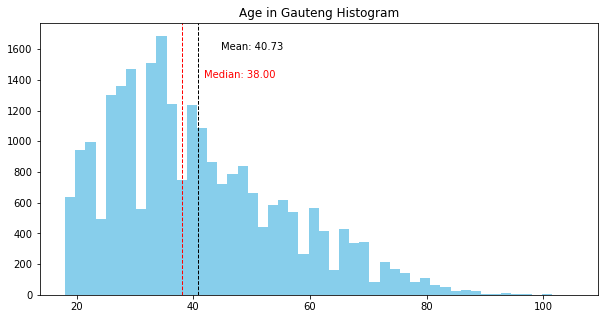

In [12]:
for indicator in indicators:
    get_histogram(column=indicator)

The mean agea is 40.73 which is maybe unsurprising given that only people 18 years and older were interviewed

In [13]:
qol17_csv = pd.read_csv('qols-2017_clean_csv.csv')

In [14]:
list(qol17_csv)

['resp_id',
 'ward',
 'munic',
 'munic_recode',
 'region',
 'ea_code',
 'sp_code',
 'sp_name',
 'mp_code',
 'mp_name',
 'date',
 'adults_listed',
 'males_listed',
 'females_listed',
 'weight',
 'A1_Pop_group',
 'A2_Sex',
 'Q9_07_foreigners',
 'Q9_10_BW_trust',
 'Q9_12_foreigners',
 'Q9_15_Black_opport_more',
 'Q9_16_Violenc_LBG',
 'Q9_20_Interracial_dating',
 'Q15_02_age',
 'Q15_20_income',
 'Q15_01_education_recode']

In [15]:
educ_per=qol17_csv[['Q15_01_education_recode']].value_counts(normalize=True).reset_index(name='percent')

In [16]:
educ_per

Q15_01_education_recode   percent
0                  Matric  0.318253
1    Secondary incomplete  0.278959
2                    More  0.260517
3            Primary only  0.095665
4            No Education  0.027643
5             Unspecified  0.018964

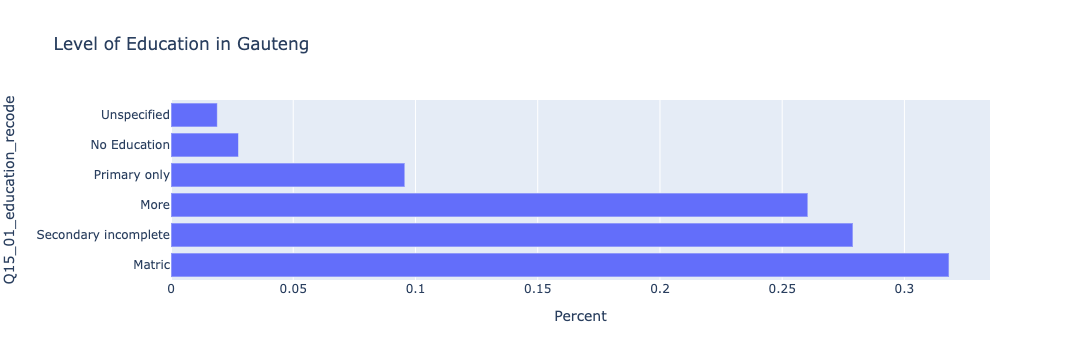

In [17]:
fig = px.bar(educ_per,
       y='Q15_01_education_recode',
       x= 'percent',
             title='Level of Education in Gauteng',
                labels={
            'percent':'Percent'})

fig.show()

While this map gives us some idea of what the levels of education are across the Gauteng region, I will now break it down by population group to see if this shows any stark differences between them. 

In [18]:
# create empty results list
comb_res= []

# create list of population groups
pop_group=['African','Coloured','Indian/Asian','White']

In [19]:
for i in(range(len(pop_group))):
    
  comb_res.append(qol17_csv[qol17_csv.A1_Pop_group == pop_group[i]][['A1_Pop_group', 'Q15_01_education_recode']].value_counts(
             normalize=True).reset_index(name='percent'))

In [20]:
com_res2 = pd.concat([comb_res[0], comb_res[1], comb_res[2], comb_res[3]])

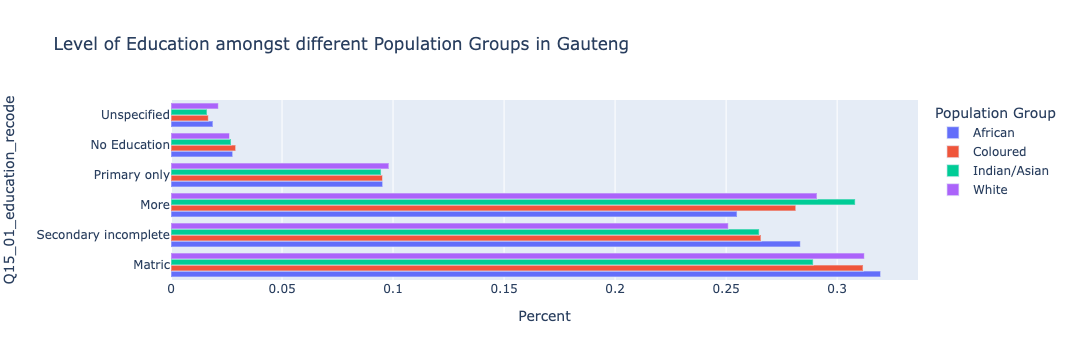

In [21]:
fig = px.bar(com_res2,
       y='Q15_01_education_recode',
       x= 'percent',
       color='A1_Pop_group',barmode='group',
             title='Level of Education amongst different Population Groups in Gauteng',
                labels={
            'percent':'Percent',
                    'A1_Pop_group': 'Population Group'})

fig.show()


The level of education 1  varies significantly across the region, with over 30% of all population groups (aside from Indian/Asian) currently enrolled in some form of schooling. While all population groups have over 25% incomplete education, Africans have the highest with 28%. Less than 10% of people interviewed across all population groups have only primary education and less than 3% have no education. 

## Income

I want to create a histogram of income, however there are a lot of people who refused to respond. I first drop these values.

In [22]:
qol17_csv.dropna()

resp_id      ward            munic munic_recode           region  \
0        20507  74201001         Emfuleni     Emfuleni         Sedibeng   
1        42510  74201001         Emfuleni     Emfuleni         Sedibeng   
2        42511  74201001         Emfuleni     Emfuleni         Sedibeng   
3        42513  74201001         Emfuleni     Emfuleni         Sedibeng   
4        63639  74201001         Emfuleni     Emfuleni         Sedibeng   
...        ...       ...              ...          ...              ...   
24884    41442  79900107  City of Tshwane      Tshwane  City of Tshwane   
24885    41443  79900107  City of Tshwane      Tshwane  City of Tshwane   
24886    41444  79900107  City of Tshwane      Tshwane  City of Tshwane   
24887    41445  79900107  City of Tshwane      Tshwane  City of Tshwane   
24888    41446  79900107  City of Tshwane      Tshwane  City of Tshwane   

        ea_code    sp_code       sp_name  mp_code      mp_name  ...  A2_Sex  \
0      76010628  760006038  Three Rivers   760006  Vereeniging  ...  Female   
1      76010624  760006038  Three Rivers   760006  Vereeniging  ...    Male   
2      76010624  760006038  Three Rivers   760006  Vereeniging  ...  Female   
3      76010623  760006038  Three Rivers   760006  Vereeniging  ...  Female   
4      76010631  760006038  Three Rivers   760006  Vereeniging  ...  Female   
...         ...        ...           ...      ...          ...  ...     ...   
24884  79910475  799058005     Vergenoeg   799058   Saulsville  ...  Female   
24885  79910483  799058006      Siahlala   799058   Saulsville  ...  Female   
24886  79910482  799058006      Siahlala   799058   Saulsville  ...  Female   
24887  79911828  799058006      Siahlala   799058   Saulsville  ...    Male   
24888  79910479  799058005     Vergenoeg   799058   Saulsville  ...  Female   

       Q9_07_foreigners              Q9_10_BW_trust  \
0              Disagree  Neither agree nor disagree   
1                 Agree                       Agree   
2              Disagree                       Agree   
3              Disagree                       Agree   
4              Disagree                       Agree   
...                 ...                         ...   
24884          Disagree                       Agree   
24885          Disagree                       Agree   
24886          Disagree                       Agree   
24887             Agree                       Agree   
24888             Agree                       Agree   

                                        Q9_12_foreigners  \
0       Foreigners are alright, but they must have le...   
1       Gauteng is for South Africans, foreigners sho...   
2       Foreigners are alright, but they must have le...   
3       Foreigners are alright, but they must have le...   
4       We have a lot in common with most of the fore...   
...                                                  ...   
24884   We have a lot in common with most of the fore...   
24885   Gauteng is for South Africans, foreigners sho...   
24886   Gauteng is for South Africans, foreigners sho...   
24887   Gauteng is for South Africans, foreigners sho...   
24888   Foreigners are alright, but they must have le...   

          Q9_15_Black_opport_more Q9_16_Violenc_LBG  \
0      Neither agree nor disagree          Disagree   
1                           Agree          Disagree   
2                        Disagree          Disagree   
3                           Agree          Disagree   
4                        Disagree          Disagree   
...                           ...               ...   
24884                       Agree          Disagree   
24885                    Disagree          Disagree   
24886                    Disagree          Disagree   
24887                    Disagree          Disagree   
24888                    Disagree          Disagree   

         Q9_20_Interracial_dating Q15_02_age       Q15_20_income  \
0                        Disagree         35  

Now I want to create a visual for income, however income is presented in brackets, so what I have done is taken the mid-point of each bracket and then presented that into a histogram

In [23]:
qol17_csv.loc[qol17_csv['Q15_20_income']=='R1 - R400','income']=200
qol17_csv.loc[qol17_csv['Q15_20_income']=='R401 - R800','income']=600
qol17_csv.loc[qol17_csv['Q15_20_income']=='R801 - R1 600','income']=1200
qol17_csv.loc[qol17_csv['Q15_20_income']=='R1 601 - R3 200','income']=2400
qol17_csv.loc[qol17_csv['Q15_20_income']=='R3 201 - R6 400','income']=4800
qol17_csv.loc[qol17_csv['Q15_20_income']=='R6 401 - R12 800','income']=9600
qol17_csv.loc[qol17_csv['Q15_20_income']=='R12 801 - R19 200','income']=16000
qol17_csv.loc[qol17_csv['Q15_20_income']=='R19 201 - R25 600','income']=22400
qol17_csv.loc[qol17_csv['Q15_20_income']=='R25 601 - R38 400','income']=32000
qol17_csv.loc[qol17_csv['Q15_20_income']=='R38 401 - R51 200','income']=44800
qol17_csv.loc[qol17_csv['Q15_20_income']=='R76 801 - R102 400 ','income']=89600
qol17_csv.loc[qol17_csv['Q15_20_income']=='R102 401 - R153 600 ','income']=128200
qol17_csv.loc[qol17_csv['Q15_20_income']=='R153 601 - R204 800 ','income']=179200
qol17_csv.loc[qol17_csv['Q15_20_income']=='R204 801 - R500 000  ','income']=352400
qol17_csv.loc[qol17_csv['Q15_20_income']=='More ','income']=500000
qol17_csv.loc[qol17_csv['Q15_20_income']==' No Income','income']=0
qol17_csv.loc[qol17_csv['Q15_20_income']=='Respondent refused','income']=np.nan
qol17_csv[['Q15_20_income','income']]

Q15_20_income   income
0      Respondent refused      NaN
1        R6 401 - R12 800   9600.0
2       R19 201 - R25 600  22400.0
3        R6 401 - R12 800   9600.0
4        R6 401 - R12 800   9600.0
...                   ...      ...
24884       R801 - R1 600   1200.0
24885     R1 601 - R3 200   2400.0
24886     R1 601 - R3 200   2400.0
24887       R801 - R1 600   1200.0
24888     R1 601 - R3 200   2400.0

[24889 rows x 2 columns]

Then I use the same code as above to create the histogram

In [24]:
def get_histogram(column = 'income'):
    series_to_plot=qol17_csv[column]

    plt.figure(figsize=(10,5))

    plt.hist(series_to_plot,bins=50,color='skyblue')

    plt.axvline(series_to_plot.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(series_to_plot.median(), color='r', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(series_to_plot.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(series_to_plot.mean()))
    plt.text(series_to_plot.median()*1.1, max_ylim*0.8, 'Median: {:.2f}'.format(series_to_plot.median()),color='r')
    plt.title('Income in Gauteng Histogram')

In [25]:
indicators = [ 'income']

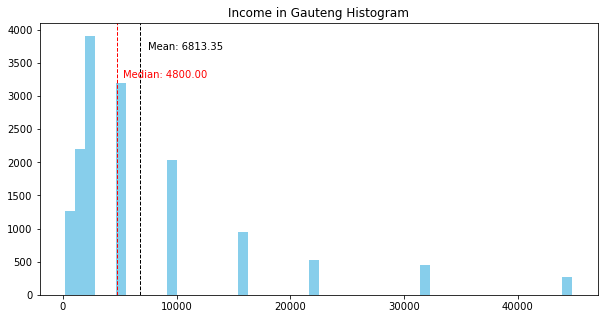

In [26]:
for indicator in indicators:
    get_histogram(column=indicator)

This income histogram is in Rand. The mean 6813.35 Rand is about 453.35 USD. However given that there are so many missing values and also my analysis of the brackets.

## Chloropleth maps 

I want to create a cholorpleth map with the BRT lines overlayed so we can see whether the attitudes for black and white trust and foreigners is different along the BRT lines. I will start by creating static chloropleth maps. Given the type of data we have, I need to use the means for each ward in order to map them.

In [27]:
qol17[['Q9_10_BW_trust']]
qol17[['bw_trust_2']]=np.nan
qol17[['bw_trust_2']]

bw_trust_2
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
...           ...
24884         NaN
24885         NaN
24886         NaN
24887         NaN
24888         NaN

[24889 rows x 1 columns]

In [28]:
qol17.loc[qol17['Q9_10_BW_trust']=='Strongly disagree','bw_trust_2']=4
qol17.loc[qol17['Q9_10_BW_trust']=='Disagree','bw_trust_2']=3
qol17.loc[qol17['Q9_10_BW_trust']=='Neither agree nor disagree','bw_trust_2']=2
qol17.loc[qol17['Q9_10_BW_trust']=='Agree','bw_trust_2']=1
qol17.loc[qol17['Q9_10_BW_trust']=='Strongly agree','bw_trust_2']=0
qol17[['Q9_10_BW_trust','bw_trust_2']]

Q9_10_BW_trust  bw_trust_2
0                  Strongly agree         0.0
1                           Agree         1.0
2                        Disagree         3.0
3      Neither agree nor disagree         2.0
4                           Agree         1.0
...                           ...         ...
24884           Strongly disagree         4.0
24885  Neither agree nor disagree         2.0
24886                       Agree         1.0
24887                       Agree         1.0
24888                       Agree         1.0

[24889 rows x 2 columns]

In [29]:
qol17

WardID LocalMunicipalityName DistrictMunicipalityName   Shape__Area  \
0      79700060            Ekurhuleni               Ekurhuleni  3.898607e+06   
1      79700060            Ekurhuleni               Ekurhuleni  3.898607e+06   
2      79700060            Ekurhuleni               Ekurhuleni  3.898607e+06   
3      79700060            Ekurhuleni               Ekurhuleni  3.898607e+06   
4      79700060            Ekurhuleni               Ekurhuleni  3.898607e+06   
...         ...                   ...                      ...           ...   
24884  79700112            Ekurhuleni               Ekurhuleni  6.723852e+06   
24885  79700112            Ekurhuleni               Ekurhuleni  6.723852e+06   
24886  79700112            Ekurhuleni               Ekurhuleni  6.723852e+06   
24887  79700112            Ekurhuleni               Ekurhuleni  6.723852e+06   
24888  79700112            Ekurhuleni               Ekurhuleni  6.723852e+06   

       Shape__Length A1_Pop_group  A2_Sex          Q5_01_frequent_trip  \
0       11472.007890      African    Male                Other purpose   
1       11472.007890      African  Female                     Shopping   
2       11472.007890      African    Male                To go to work   
3       11472.007890      African  Female                To go to work   
4       11472.007890      African  Female                To go to work   
...              ...          ...     ...                          ...   
24884   14259.004191      African    Male                Other purpose   
24885   14259.004191      African  Female  To go to the place of study   
24886   14259.004191      African    Male                     Shopping   
24887   14259.004191      African    Male                     Shopping   
24888   14259.004191      African  Female                     Shopping   

      Q5_06_1_Walk Q5_06_2_Bike  ...    Q5_11_BRT_Freq Q5_13_why_use_BRT  \
0               No           No  ...             Never              None   
1              Yes           No  ...             Never              None   
2               No           No  ...             Never              None   
3               No           No  ...             Never              None   
4               No           No  ...             Never              None   
...            ...          ...  ...               ...               ...   
24884           No           No  ...  Every few months       Reliability   
24885           No           No  ...             Never              None   
24886           No           No  ...             Never              None   
24887           No           No  ...             Never              None   
24888          Yes           No  ...             Never              None   

      Q5_18_Walk_prox_public_transp Q9_07_violence_to_foreigners  \
0                  Up to 10 minutes            Strongly disagree   
1             From 11 to 20 minutes                        Agree   
2                  Up to 10 minutes                        Agree   
3                  Up to 10 minutes                     Disagree   
4             From 11 to 20 minutes                     Disagree   
...                             ...                          ...   
24884              Up to 10 minutes            Strongly disagree   
24885          More than 40 minutes                     Disagree   
24886              Up to 10 minutes                        Agree   
24887              Up to 10 minutes                     Disagree   
24888              Up to 10 minutes                     Disagree   

                   Q9_10_BW_trust  \
0                  Strongly agree   
1                           Agree   
2                        Disagree   
3      Neither agree nor disagree   
4                           Agree   
...                           ...   
24884           Strongly disagree   
24885  Neither agree nor disagree   
24886                       Agree   
24887                       Agree   
24888                 

In [30]:
qol17_mean = qol17.groupby("WardID").mean('bw_trust_2')

In [31]:
qol17_mean

Shape__Area  Shape__Length  Q15_02_age  bw_trust_2
WardID                                                       
74201001  3.232079e+07   36420.716346   47.611111    1.944444
74201002  2.466977e+06   10296.574024   46.810811    2.000000
74201003  6.355803e+06   14187.024442   43.176471    2.088235
74201004  2.347115e+07   25067.348146   40.941176    1.617647
74201005  1.607959e+07   19909.678889   44.903226    1.838710
...                ...            ...         ...         ...
79900103  6.245817e+07   47894.620922   37.861111    1.555556
79900104  2.630182e+07   23861.424953   38.486486    1.459459
79900105  1.322401e+09  327991.052402   39.483871    1.000000
79900106  3.112783e+07   25641.209946   35.447368    1.868421
79900107  8.107967e+06   14592.597733   39.510638    1.063830

[529 rows x 4 columns]

In [32]:
qol17_mean.drop(columns=['Shape__Area','Shape__Length'])

Q15_02_age  bw_trust_2
WardID                          
74201001   47.611111    1.944444
74201002   46.810811    2.000000
74201003   43.176471    2.088235
74201004   40.941176    1.617647
74201005   44.903226    1.838710
...              ...         ...
79900103   37.861111    1.555556
79900104   38.486486    1.459459
79900105   39.483871    1.000000
79900106   35.447368    1.868421
79900107   39.510638    1.063830

[529 rows x 2 columns]

I have to merge the new dataframe onto the qol17 dataframe in order to map it.

In [33]:
qol17_2= qol17.merge(qol17_mean, on='WardID')

qol17_2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 24889 entries, 0 to 24888
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   WardID                         24889 non-null  int64   
 1   LocalMunicipalityName          24889 non-null  object  
 2   DistrictMunicipalityName       24889 non-null  object  
 3   Shape__Area_x                  24889 non-null  float64 
 4   Shape__Length_x                24889 non-null  float64 
 5   A1_Pop_group                   24889 non-null  object  
 6   A2_Sex                         24889 non-null  object  
 7   Q5_01_frequent_trip            24889 non-null  object  
 8   Q5_06_1_Walk                   23924 non-null  object  
 9   Q5_06_2_Bike                   23924 non-null  object  
 10  Q5_06_3_Motorbike              23924 non-null  object  
 11  Q5_06_4_Car_driver             23924 non-null  object  
 12  Q5_06_5_Car_passenger   

I later want to do some analysis on just the BRT wards, but I will need to clean the data, which I will do in excel. Hence I save it as a csv

In [34]:
qol17_2.to_csv('qol_17_2.csv')

Now I map the data. As I will want to compare this data to 2011 data, I will use Quantiles, as I think this will allow for the best comparisons. I also add the BRT line data}

In [35]:
BRT_lines=gpd.read_file("Gauteng_BRT_lines.shp")

BRT_lines

Name  Shape_Leng  ID  LENGTH  DIR  TYPE  BRT1  BRT2  BRT3  BRT4  ...  \
0   TSH    0.025628   0    0.00    0  None     0     0     0     0  ...   
1   TSH    0.059222   6    6.50    0   BRT     1     0     0     0  ...   
2   TSH    0.036972  23    5.14    0   BRT     1     0     0     0  ...   
3   TSH    0.007126  21    0.79    0   BRT     1     0     0     0  ...   
4   TSH    0.011501   4    1.25    0   BRT     1     0     0     0  ...   
5   EKU    0.000000  67   17.07    0   BRT     0     0     0     0  ...   
6   EKU    0.000000  82    4.36    0   BRT     0     0     0     0  ...   
7   EKU    0.000000   0    0.00    0  None     0     0     0     0  ...   
8   EKU    0.000000   0    0.00    0  None     0     0     0     0  ...   
9   JHB    0.000000   0    0.00    0     B     0     0     0     0  ...   
10  JHB    0.000000   0    0.00    0     B     0     0     0     0  ...   

    PHASE_3  PHASE_4  PHASE_5  PHASE_6    STATUS  NETWORK_EV  ORIGIN  \
0       0.0      0.0      0.0      0.0      None        None    None   
1       0.0      0.0      0.0      0.0      None        None    None   
2       0.0      0.0      0.0      0.0      None        None    None   
3       0.0      0.0      0.0      0.0      None        None    None   
4       0.0      0.0      0.0      0.0      None        None    None   
5       0.0      0.0      0.0      0.0      None        None    None   
6       0.0      0.0      0.0      0.0      None        None    None   
7       0.0      0.0      0.0      0.0      None        None    None   
8       0.0      0.0      0.0      0.0      None        None    None   
9       0.0      0.0      1.0      1.0  Existing         BRT    None   
10      0.0      0.0      1.0      1.0  Proposed         BRT    None   

    DESTINATIO  AVESPEED                                           geometry  
0         None      None  LINESTRING (28.22520 -25.75598, 28.22529 -25.7...  
1         None      None  LINESTRING (28.18702 -25.68882, 28.18740 -25.6...  
2         None      None  LINESTRING (28.19085 -25.75045, 28.19212 -25.7...  
3         None      None  LINESTRING (28.19029 -25.74334, 28.19085 -25.7...  
4         None      None  LINESTRING (28.18304 -25.67811, 28.18342 -25.6...  
5         None      None  LINESTRING (28.19112 -26.08927, 28.19046 -26.0...  
6         None      None  LINESTRING (28.19185 -26.09092, 28.19209 -26.0...  
7         None      None  LINESTRING (28.19112 -26.08927, 28.19299 -26.0...  
8         None      None  LINESTRING (28.20917 -26.14441, 28.20929 -26.1...  
9         None      None  LINESTRING (27.87592 -26.26884, 27.87695 -26.2...  
10        None      None  LINESTRING (28.05931 -26.10887, 28.05923 -26.1...  

[11 rows x 49 columns]

Text(0.5, 1.0, 'Levels of Black and White Trust in 2017 with BRT lines')

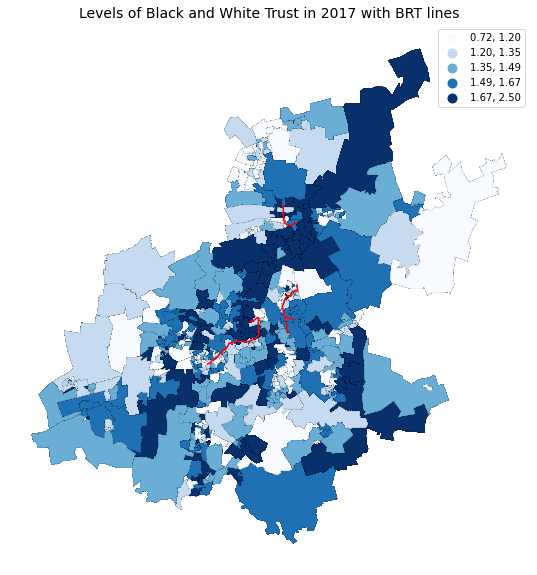

In [36]:
ax = qol17_2.plot(figsize=(12,10),
                 column='bw_trust_2_y',
                 legend=True,
                 scheme='Quantiles',
              cmap='Blues', edgecolor='black', linewidth=0.05);

BRT_lines.plot(ax=ax,
               color='red',
               markersize=10,
                   legend=False,
               zorder=1)
ax.axis("off")

plt.title('Levels of Black and White Trust in 2017 with BRT lines', fontsize=14)

In [37]:
bw_mean = qol17.groupby("WardID").mean('bw_trust_2') [["bw_trust_2"]]

In [38]:
bw_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 74201001 to 79900107
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bw_trust_2  529 non-null    float64
dtypes: float64(1)
memory usage: 8.3 KB


In [39]:
 #qol17_2.to_csv('qol_17_2.csv')

## Analysis for variable on attitudes towards foreigners

I will now do the same for the other variables and years

In [40]:
qol17

WardID LocalMunicipalityName DistrictMunicipalityName   Shape__Area  \
0      79700060            Ekurhuleni               Ekurhuleni  3.898607e+06   
1      79700060            Ekurhuleni               Ekurhuleni  3.898607e+06   
2      79700060            Ekurhuleni               Ekurhuleni  3.898607e+06   
3      79700060            Ekurhuleni               Ekurhuleni  3.898607e+06   
4      79700060            Ekurhuleni               Ekurhuleni  3.898607e+06   
...         ...                   ...                      ...           ...   
24884  79700112            Ekurhuleni               Ekurhuleni  6.723852e+06   
24885  79700112            Ekurhuleni               Ekurhuleni  6.723852e+06   
24886  79700112            Ekurhuleni               Ekurhuleni  6.723852e+06   
24887  79700112            Ekurhuleni               Ekurhuleni  6.723852e+06   
24888  79700112            Ekurhuleni               Ekurhuleni  6.723852e+06   

       Shape__Length A1_Pop_group  A2_Sex          Q5_01_frequent_trip  \
0       11472.007890      African    Male                Other purpose   
1       11472.007890      African  Female                     Shopping   
2       11472.007890      African    Male                To go to work   
3       11472.007890      African  Female                To go to work   
4       11472.007890      African  Female                To go to work   
...              ...          ...     ...                          ...   
24884   14259.004191      African    Male                Other purpose   
24885   14259.004191      African  Female  To go to the place of study   
24886   14259.004191      African    Male                     Shopping   
24887   14259.004191      African    Male                     Shopping   
24888   14259.004191      African  Female                     Shopping   

      Q5_06_1_Walk Q5_06_2_Bike  ...    Q5_11_BRT_Freq Q5_13_why_use_BRT  \
0               No           No  ...             Never              None   
1              Yes           No  ...             Never              None   
2               No           No  ...             Never              None   
3               No           No  ...             Never              None   
4               No           No  ...             Never              None   
...            ...          ...  ...               ...               ...   
24884           No           No  ...  Every few months       Reliability   
24885           No           No  ...             Never              None   
24886           No           No  ...             Never              None   
24887           No           No  ...             Never              None   
24888          Yes           No  ...             Never              None   

      Q5_18_Walk_prox_public_transp Q9_07_violence_to_foreigners  \
0                  Up to 10 minutes            Strongly disagree   
1             From 11 to 20 minutes                        Agree   
2                  Up to 10 minutes                        Agree   
3                  Up to 10 minutes                     Disagree   
4             From 11 to 20 minutes                     Disagree   
...                             ...                          ...   
24884              Up to 10 minutes            Strongly disagree   
24885          More than 40 minutes                     Disagree   
24886              Up to 10 minutes                        Agree   
24887              Up to 10 minutes                     Disagree   
24888              Up to 10 minutes                     Disagree   

                   Q9_10_BW_trust  \
0                  Strongly agree   
1                           Agree   
2                        Disagree   
3      Neither agree nor disagree   
4                           Agree   
...                           ...   
24884           Strongly disagree   
24885  Neither agree nor disagree   
24886                       Agree   
24887                       Agree   
24888                 

In [41]:
qol17[['Q9_12_foreigners_scenario']]
qol17[['att_foreign']]= np.nan
qol17.loc[qol17['Q9_12_foreigners_scenario']==' We have a lot in common with most of the foreigners, they must  be allowed to stay','att_foreign']=1
qol17.loc[qol17['Q9_12_foreigners_scenario']==' Foreigners are alright, but they must have legal permission to stay from the government','att_foreign']=0
qol17.loc[qol17['Q9_12_foreigners_scenario']==' Gauteng is for South Africans, foreigners should go back home','att_foreign']=0
qol17[['Q9_12_foreigners_scenario','att_foreign']]

Q9_12_foreigners_scenario  att_foreign
0       Gauteng is for South Africans, foreigners sho...          0.0
1       Foreigners are alright, but they must have le...          0.0
2       Gauteng is for South Africans, foreigners sho...          0.0
3       We have a lot in common with most of the fore...          1.0
4       Foreigners are alright, but they must have le...          0.0
...                                                  ...          ...
24884   We have a lot in common with most of the fore...          1.0
24885   Foreigners are alright, but they must have le...          0.0
24886   Gauteng is for South Africans, foreigners sho...          0.0
24887   Foreigners are alright, but they must have le...          0.0
24888   Gauteng is for South Africans, foreigners sho...          0.0

[24889 rows x 2 columns]

In [42]:
att_foreign_mean = qol17.groupby("WardID").mean('att_foreign') [["att_foreign"]]

In [43]:
att_foreign_mean

att_foreign
WardID               
74201001     0.055556
74201002     0.081081
74201003     0.147059
74201004     0.117647
74201005     0.193548
...               ...
79900103     0.111111
79900104     0.162162
79900105     0.193548
79900106     0.421053
79900107     0.106383

[529 rows x 1 columns]

In [44]:
att_foreign_mean.to_csv('qol17_att_foreign_17_mean.csv')

In [45]:
qol17_3= qol17.merge(att_foreign_mean, on='WardID')

qol17_3.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 24889 entries, 0 to 24888
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   WardID                         24889 non-null  int64   
 1   LocalMunicipalityName          24889 non-null  object  
 2   DistrictMunicipalityName       24889 non-null  object  
 3   Shape__Area                    24889 non-null  float64 
 4   Shape__Length                  24889 non-null  float64 
 5   A1_Pop_group                   24889 non-null  object  
 6   A2_Sex                         24889 non-null  object  
 7   Q5_01_frequent_trip            24889 non-null  object  
 8   Q5_06_1_Walk                   23924 non-null  object  
 9   Q5_06_2_Bike                   23924 non-null  object  
 10  Q5_06_3_Motorbike              23924 non-null  object  
 11  Q5_06_4_Car_driver             23924 non-null  object  
 12  Q5_06_5_Car_passenger   

In [46]:
qol17_3

WardID LocalMunicipalityName DistrictMunicipalityName   Shape__Area  \
0      79700060            Ekurhuleni               Ekurhuleni  3.898607e+06   
1      79700060            Ekurhuleni               Ekurhuleni  3.898607e+06   
2      79700060            Ekurhuleni               Ekurhuleni  3.898607e+06   
3      79700060            Ekurhuleni               Ekurhuleni  3.898607e+06   
4      79700060            Ekurhuleni               Ekurhuleni  3.898607e+06   
...         ...                   ...                      ...           ...   
24884  79700112            Ekurhuleni               Ekurhuleni  6.723852e+06   
24885  79700112            Ekurhuleni               Ekurhuleni  6.723852e+06   
24886  79700112            Ekurhuleni               Ekurhuleni  6.723852e+06   
24887  79700112            Ekurhuleni               Ekurhuleni  6.723852e+06   
24888  79700112            Ekurhuleni               Ekurhuleni  6.723852e+06   

       Shape__Length A1_Pop_group  A2_Sex          Q5_01_frequent_trip  \
0       11472.007890      African    Male                Other purpose   
1       11472.007890      African  Female                     Shopping   
2       11472.007890      African    Male                To go to work   
3       11472.007890      African  Female                To go to work   
4       11472.007890      African  Female                To go to work   
...              ...          ...     ...                          ...   
24884   14259.004191      African    Male                Other purpose   
24885   14259.004191      African  Female  To go to the place of study   
24886   14259.004191      African    Male                     Shopping   
24887   14259.004191      African    Male                     Shopping   
24888   14259.004191      African  Female                     Shopping   

      Q5_06_1_Walk Q5_06_2_Bike  ... Q5_18_Walk_prox_public_transp  \
0               No           No  ...              Up to 10 minutes   
1              Yes           No  ...         From 11 to 20 minutes   
2               No           No  ...              Up to 10 minutes   
3               No           No  ...              Up to 10 minutes   
4               No           No  ...         From 11 to 20 minutes   
...            ...          ...  ...                           ...   
24884           No           No  ...              Up to 10 minutes   
24885           No           No  ...          More than 40 minutes   
24886           No           No  ...              Up to 10 minutes   
24887           No           No  ...              Up to 10 minutes   
24888          Yes           No  ...              Up to 10 minutes   

      Q9_07_violence_to_foreigners              Q9_10_BW_trust  \
0                Strongly disagree              Strongly agree   
1                            Agree                       Agree   
2                            Agree                    Disagree   
3                         Disagree  Neither agree nor disagree   
4                         Disagree                       Agree   
...                            ...                         ...   
24884            Strongly disagree           Strongly disagree   
24885                     Disagree  Neither agree nor disagree   
24886                        Agree                       Agree   
24887                     Disagree                       Agree   
24888                     Disagree                       Agree   

                               Q9_12_foreigners_scenario  \
0       Gauteng is for South Africans, foreigners sho...   
1       Foreigners are alright, but they must have le...   
2       Gauteng is for South Africans, foreigners sho...   
3       We have a lot in common with most of the fore...   
4       Foreigners are alright, but they must have le...   
...                                                  ...   
24884   We have a lot in common with most of the fore...   
24885   Foreigners are alright, but they must

Note that I am using the Quintiles scheme, to make comparisons easier

Text(0.5, 1.0, 'Attitudes towards foreigners in 2017 with BRT lines')

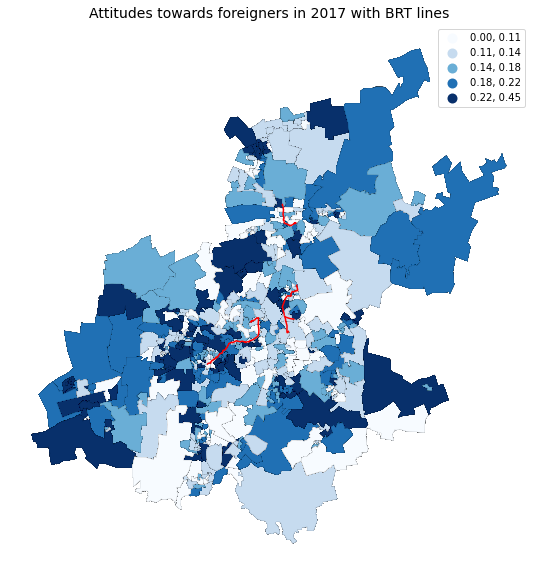

In [47]:
base = qol17_3.plot(figsize=(12,10),
                 column='att_foreign_y',
                 legend=True,
                  scheme='Quantiles',
              cmap='Blues', edgecolor='black', linewidth=0.05);

BRT_lines.plot(ax=base,
               color='red',
               markersize=10,
                   legend=False,
               zorder=1)

base.axis("off")

plt.title('Attitudes towards foreigners in 2017 with BRT lines', fontsize=14)

In [48]:
qol11 = gpd.read_file('qol_wards_2011_clean.geojson')

In [49]:
qol11.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16730 entries, 0 to 16729
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   WardID                                        16730 non-null  int64   
 1   LocalMunicipalityName                         16730 non-null  object  
 2   DistrictMunicipalityName                      16730 non-null  object  
 3   Shape__Area                                   16730 non-null  float64 
 4   Shape__Length                                 16730 non-null  float64 
 5   A1_Pop_Group                                  16729 non-null  float64 
 6   A2_Sex                                        16729 non-null  float64 
 7   A_4_1_Frequent_trip_purpose                   16561 non-null  float64 
 8   Q4_5 Walk_Frequent_Trip_Transp                2923 non-null   float64 
 9   Q4_5 Bike_Frequent_Trip_Transp            

In [50]:
qol11[['A_6_36_foreigners_recode']]
qol11[['att_foreign_11']]= np.nan
qol11

WardID LocalMunicipalityName DistrictMunicipalityName   Shape__Area  \
0      74803012        Rand West City                West Rand  6.661918e+06   
1      74803012        Rand West City                West Rand  6.661918e+06   
2      74803012        Rand West City                West Rand  6.661918e+06   
3      74803012        Rand West City                West Rand  6.661918e+06   
4      74803012        Rand West City                West Rand  6.661918e+06   
...         ...                   ...                      ...           ...   
16725  79900105       City of Tshwane          City of Tshwane  1.322401e+09   
16726  79900105       City of Tshwane          City of Tshwane  1.322401e+09   
16727  79900105       City of Tshwane          City of Tshwane  1.322401e+09   
16728  79900105       City of Tshwane          City of Tshwane  1.322401e+09   
16729  79900105       City of Tshwane          City of Tshwane  1.322401e+09   

       Shape__Length  A1_Pop_Group  A2_Sex  A_4_1_Frequent_trip_purpose  \
0       13537.806926           1.0     2.0                          4.0   
1       13537.806926           1.0     2.0                          8.0   
2       13537.806926           1.0     2.0                          8.0   
3       13537.806926           1.0     2.0                          1.0   
4       13537.806926           1.0     1.0                          1.0   
...              ...           ...     ...                          ...   
16725  327991.053295           1.0     2.0                          8.0   
16726  327991.053295           1.0     2.0                          4.0   
16727  327991.053295           1.0     2.0                          4.0   
16728  327991.053295           1.0     2.0                          4.0   
16729  327991.053295           1.0     2.0                          1.0   

       Q4_5 Walk_Frequent_Trip_Transp  Q4_5 Bike_Frequent_Trip_Transp  ...  \
0                                 1.0                             1.0  ...   
1                                 NaN                             NaN  ...   
2                                 NaN                             NaN  ...   
3                                 1.0                             NaN  ...   
4                                 NaN                             NaN  ...   
...                               ...                             ...  ...   
16725                             NaN                             NaN  ...   
16726                             NaN                             NaN  ...   
16727                             NaN                             NaN  ...   
16728                             NaN                             NaN  ...   
16729                             NaN                             NaN  ...   

       A_12_2_age  A1_Pop_Group_recode  A2_Sex_recode  \
0            41.0              African         Female   
1            52.0              African         Female   
2            35.0              African         Female   
3            35.0              African         Female   
4            31.0              African           Male   
...           ...                  ...            ...   
16725        60.0              African         Female   
16726        26.0              African         Female   
16727        54.0              African         Female   
16728        22.0              African         Female   
16729        20.0              African         Female   

       A_4_1_Frequent_trip_purpose_recode  \
0                                Shopping   
1                  I never make any trips   
2                  I never make any trips   
3                           To go to work   
4                           To go to work   
...                                   ...   
16725              I never make any trips   
16726                            Shopping   
16727                            Shopping   
16728                            Shopping   
16729                       To

In [51]:
qol11.loc[qol11['A_6_36_foreigners_recode']=='Second person','att_foreign_11']=1
qol11.loc[qol11['A_6_36_foreigners_recode']=='Third person','att_foreign_11']=0
qol11.loc[qol11['A_6_36_foreigners_recode']=='First person','att_foreign_11']=0
qol11[['A_6_36_foreigners_recode','att_foreign_11']]

A_6_36_foreigners_recode  att_foreign_11
0                 Third person             0.0
1                 First person             0.0
2                 First person             0.0
3                 First person             0.0
4                 First person             0.0
...                        ...             ...
16725             Third person             0.0
16726             Third person             0.0
16727             Third person             0.0
16728             Third person             0.0
16729             Third person             0.0

[16730 rows x 2 columns]

In [52]:
att_foreign_mean_11 = qol11.groupby("WardID").mean('att_foreign_11') [["att_foreign_11"]]

In [53]:
att_foreign_mean_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508 entries, 74201001 to 79900105
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   att_foreign_11  507 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


In [54]:
att_foreign_mean_11.to_csv('qol11_att_foreign_mean.csv')

In [55]:
qol11_1= qol11.merge(att_foreign_mean_11, on='WardID')

qol11_1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 16730 entries, 0 to 16729
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   WardID                                        16730 non-null  int64   
 1   LocalMunicipalityName                         16730 non-null  object  
 2   DistrictMunicipalityName                      16730 non-null  object  
 3   Shape__Area                                   16730 non-null  float64 
 4   Shape__Length                                 16730 non-null  float64 
 5   A1_Pop_Group                                  16729 non-null  float64 
 6   A2_Sex                                        16729 non-null  float64 
 7   A_4_1_Frequent_trip_purpose                   16561 non-null  float64 
 8   Q4_5 Walk_Frequent_Trip_Transp                2923 non-null   float64 
 9   Q4_5 Bike_Frequent_Trip_Transp            

Text(0.5, 1.0, 'Attitudes towards foreigners in 2011 with BRT lines')

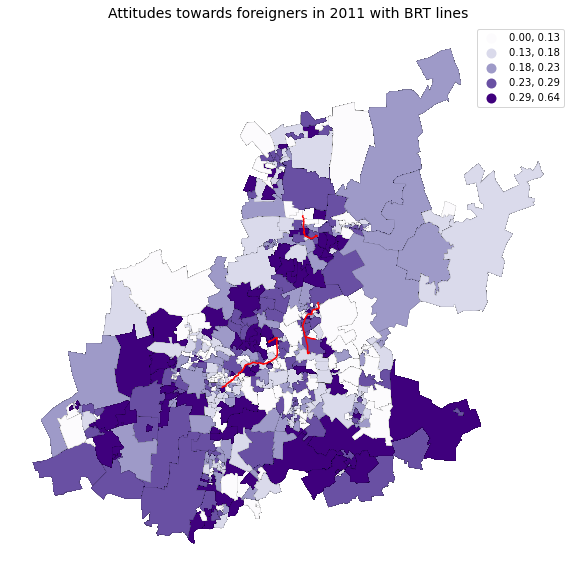

In [56]:
base = qol11_1.plot(figsize=(12,10),
                 column='att_foreign_11_y',
                 legend=True,
                 scheme='Quantiles',
              cmap='Purples', edgecolor='black', linewidth=0.05);

BRT_lines.plot(ax=base,
               color='red',
               markersize=10,
                   legend=False,
               zorder=1)

base.axis("off")

plt.title('Attitudes towards foreigners in 2011 with BRT lines', fontsize=14)

Again, I will save the dataframe so that I can create a new dataframe with clean BRT data in excel.

In [57]:
qol11_1.to_csv('qol11_att_foreign_11.csv')

## BRT Black and White Trust 2011

In [58]:
qol11[['A_6_31_BW_trust_recode']]
qol11[['bw_trust_11']]=np.nan
qol11[['bw_trust_11']]

bw_trust_11
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
...            ...
16725          NaN
16726          NaN
16727          NaN
16728          NaN
16729          NaN

[16730 rows x 1 columns]

In [59]:
qol11.loc[qol11['A_6_31_BW_trust_recode']=='Strongly Disagree','bw_trust_11']=4
qol11.loc[qol11['A_6_31_BW_trust_recode']=='Disagree','bw_trust_11']=3
qol11.loc[qol11['A_6_31_BW_trust_recode']=='Neither','bw_trust_11']=2
qol11.loc[qol11['A_6_31_BW_trust_recode']=='Agree','bw_trust_11']=1
qol11.loc[qol11['A_6_31_BW_trust_recode']=='Strongly Agree','bw_trust_11']=0
qol11.loc[qol11['A_6_31_BW_trust_recode']=='None','bw_trust_11']=np.nan
qol11[['A_6_31_BW_trust_recode','bw_trust_11']]

A_6_31_BW_trust_recode  bw_trust_11
0                       None          NaN
1             Strongly Agree          0.0
2                      Agree          1.0
3             Strongly Agree          0.0
4             Strongly Agree          0.0
...                      ...          ...
16725               Disagree          3.0
16726               Disagree          3.0
16727                Neither          2.0
16728         Strongly Agree          0.0
16729               Disagree          3.0

[16730 rows x 2 columns]

In [60]:
qol11_mean = qol11.groupby("WardID").mean('bw_trust_11')

In [61]:
qol11_mean.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 508 entries, 74201001 to 79900105
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Shape__Area                                   508 non-null    float64
 1   Shape__Length                                 508 non-null    float64
 2   A1_Pop_Group                                  507 non-null    float64
 3   A2_Sex                                        507 non-null    float64
 4   A_4_1_Frequent_trip_purpose                   507 non-null    float64
 5   Q4_5 Walk_Frequent_Trip_Transp                459 non-null    float64
 6   Q4_5 Bike_Frequent_Trip_Transp                223 non-null    float64
 7   Q4_5 Motorbike_Frequent_Trip_Transp           37 non-null     float64
 8   Q4_5 Car_Driver_Frequent_Trip_Transp          433 non-null    float64
 9   Q4_5 Car_Passenger_Frequent_Trip_Transp      

In [62]:
qol11_mean.drop(columns=['Shape__Area','Shape__Length','A1_Pop_Group','A2_Sex','A_4_1_Frequent_trip_purpose','Q4_5 Bike_Frequent_Trip_Transp','Q4_5 Walk_Frequent_Trip_Transp','Q4_5 Motorbike_Frequent_Trip_Transp','Q4_5 Car_Driver_Frequent_Trip_Transp','Q4_5 Car_Passenger_Frequent_Trip_Transp','Q4_5 Taxi_Frequent_Trip_Transp','Q4_5 Train_Frequent_Trip_Transp','Q4_5 BRT_Frequent_Trip_Transp','Q4_5 School_bus_Frequent_Trip_Transp','Q4_5 Other_Bus_Frequent_Trip_Transp','Q4_5 Other_Type_Frequent_Trip_Transp','A_4_8_Walking_proxim_pub_transp','A_4_11_main_reason_no_pub_transport','A_6_31_BW_trust','A_6_36_foreigners','A_12_2_age','att_foreign_11','Q4_5 Car_Passenger_Lift_Frequent_Trip_Transp','Q4_5 Gautrain_Frequent_Trip_Transp'])

bw_trust_11
WardID               
74201001     1.095238
74201002     1.360000
74201003     1.409091
74201004     1.370370
74201005     1.160000
...               ...
79900101     1.000000
79900102     1.461538
79900103     1.261538
79900104     0.750000
79900105     1.400000

[508 rows x 1 columns]

In [63]:
qol11_mean.to_csv('qol11_BWtrust_mean.csv')

In [64]:
qol11_2= qol11.merge(qol11_mean, on='WardID')

qol11_2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 16730 entries, 0 to 16729
Data columns (total 61 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   WardID                                          16730 non-null  int64   
 1   LocalMunicipalityName                           16730 non-null  object  
 2   DistrictMunicipalityName                        16730 non-null  object  
 3   Shape__Area_x                                   16730 non-null  float64 
 4   Shape__Length_x                                 16730 non-null  float64 
 5   A1_Pop_Group_x                                  16729 non-null  float64 
 6   A2_Sex_x                                        16729 non-null  float64 
 7   A_4_1_Frequent_trip_purpose_x                   16561 non-null  float64 
 8   Q4_5 Walk_Frequent_Trip_Transp_x                2923 non-null   float64 
 9   Q4_5 Bike_Frequent_T

Text(0.5, 1.0, 'Levels of Black and White Trust in 2011 with BRT lines')

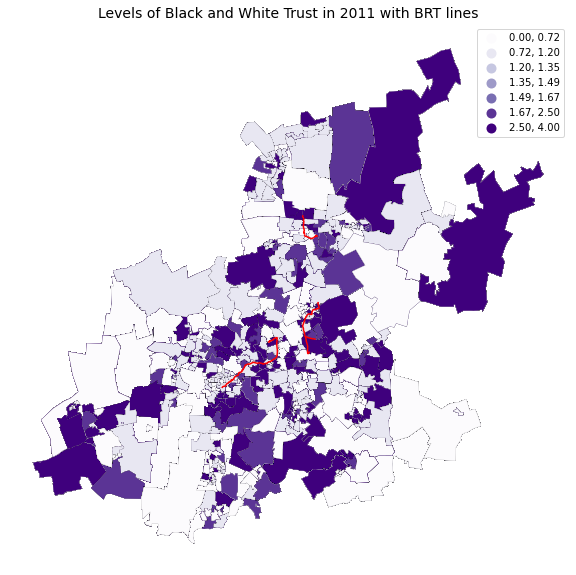

In [65]:
base = qol11.plot(figsize=(12,10),
                 column='bw_trust_11',
                 legend=True,
                 scheme='user_defined',
                classification_kwds={'bins': [0.72, 1.2, 1.35, 1.49, 1.67,2.5]},
              cmap='Purples', edgecolor='black', linewidth=0.05);

BRT_lines.plot(ax=base,
               color='red',
               markersize=10,
                   legend=False,
               zorder=1)

base.axis("off")

plt.title('Levels of Black and White Trust in 2011 with BRT lines', fontsize=14)

I wanted to also do natural breaks here, but was getting an error message that there are not enough values in each quintile, so instead I chose NaturalBreaks as a scheme. However for comparisons I will use the same brackets as in the quintiles for 2017, so that the comparison is easier.

In [66]:
qol11.to_csv('qol11_BWtrust.csv')

Trying a side by side plot, so we can look at 2011 and 2017 together

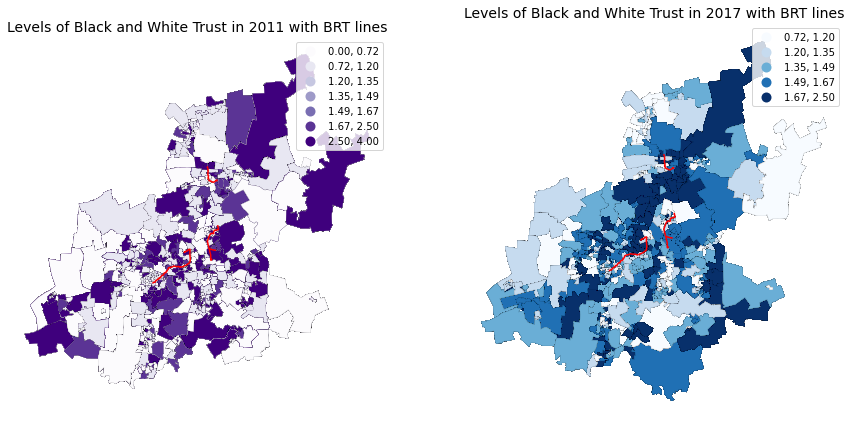

In [67]:
column1 = 'bw_trust_11'
column2 = 'bw_trust_2_y'
fig,ax = plt.subplots(1,2,figsize=(15,8))

base = qol11.plot(ax=ax[0],
                 column='bw_trust_11',
                 legend=True,
                 scheme='user_defined',
                classification_kwds={'bins': [0.72, 1.2, 1.35, 1.49, 1.67,2.5]},
              cmap='Purples', edgecolor='black', linewidth=0.05)
BRT_lines.plot(ax=base,
               color='red',
               markersize=10,
                   legend=False,
               zorder=1)


ax[0].set_title('Levels of Black and White Trust in 2011 with BRT lines', fontsize=14)
ax[0].axis('off');

base2 = qol17_2.plot(ax=ax[1],
                 column='bw_trust_2_y',
                 legend=True,
                 scheme='Quantiles',
              cmap='Blues', edgecolor='black', linewidth=0.05)

BRT_lines.plot(ax=base2,
               color='red',
               markersize=10,
                   legend=False,
               zorder=1)


ax[1].set_title('Levels of Black and White Trust in 2017 with BRT lines', fontsize=14)
ax[1].axis('off');

## Combining the two variables

Here I want to map out out both variables and highlight in red the attitudes to foreigners that are the most positive (0.4 on a 1-0 scale). 

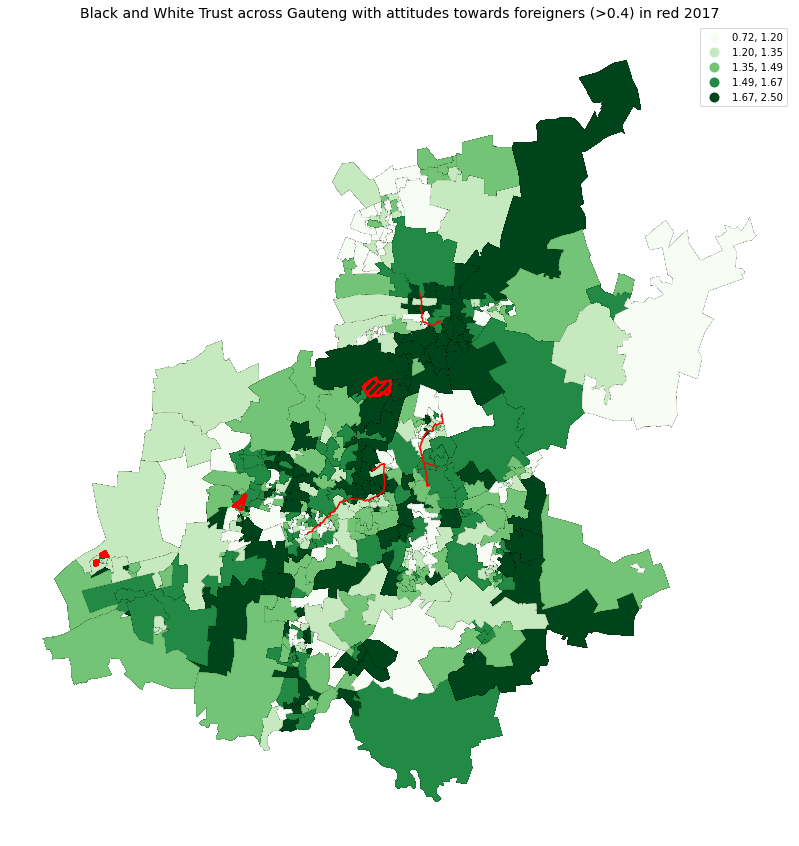

In [68]:
column1 = 'bw_trust_2_y'
column2 = 'att_foreign_y'
fig,ax = plt.subplots(figsize=(15,15))

base1 = qol17_2.plot(ax=ax,
         column=column1,
         legend=True,
             scheme='Quantiles',
              cmap='Greens', edgecolor='black', linewidth=0.05
        )

base2 = qol17_3[qol17_3['att_foreign_y'] >= 0.4].boundary.plot(ax=ax,
        alpha=0.5,
        linewidth=2,
        hatch="///",
        color='red'
        )

BRT_lines.plot(ax=base1,
               color='red',
               markersize=10,
                   legend=False,
               zorder=1)


ax.set_title('Black and White Trust across Gauteng with attitudes towards foreigners (>0.4) in red 2017', fontsize=14)
ax.axis('off');